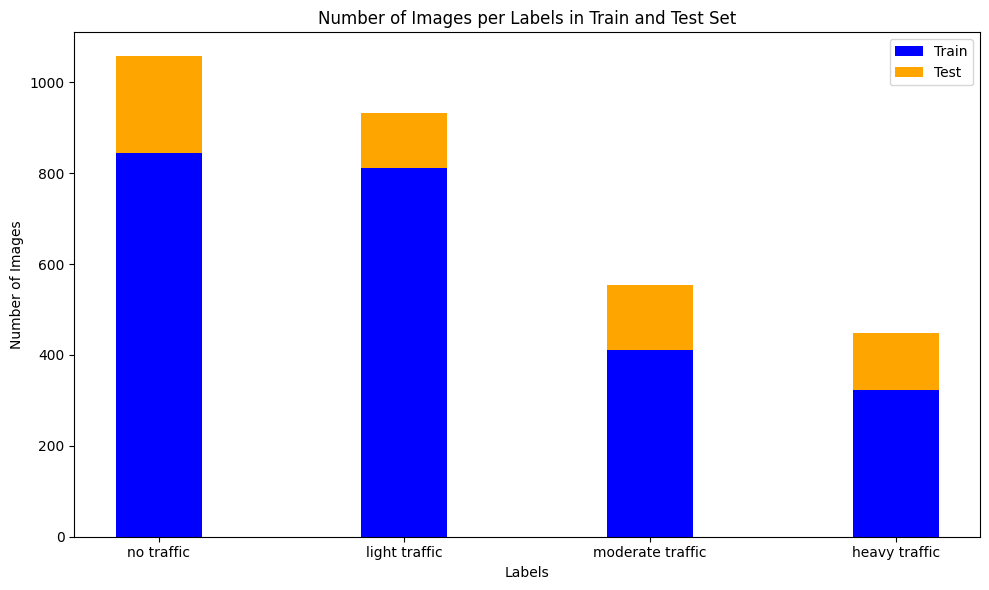

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the paths to the train and test directories
train_dir = '/kaggle/input/dhaka-traffic-classification-4-levels/Dhaka City Traffic Classification Dataset - 4-Level Congestion Analysis/train'
test_dir = '/kaggle/input/dhaka-traffic-classification-4-levels/Dhaka City Traffic Classification Dataset - 4-Level Congestion Analysis/test'

# Define the class order explicitly
class_order = ['no traffic', 'light traffic', 'moderate traffic', 'heavy traffic']

# Initialize dictionaries to hold the number of files for each class
train_file_counts = {cls: 0 for cls in class_order}
test_file_counts = {cls: 0 for cls in class_order}

# Count files in each class in the train directory
for cls in class_order:
    class_path = os.path.join(train_dir, cls)
    if os.path.isdir(class_path):  # Make sure it's a directory
        train_file_counts[cls] = len(os.listdir(class_path))  # Count files in the directory

# Count files in each class in the test directory
for cls in class_order:
    class_path = os.path.join(test_dir, cls)
    if os.path.isdir(class_path):  # Make sure it's a directory
        test_file_counts[cls] = len(os.listdir(class_path))  # Count files in the directory

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare the bar plot data
width = 0.35  # width of the bars
train_values = [train_file_counts[cls] for cls in class_order]
test_values = [test_file_counts[cls] for cls in class_order]

# Create bars for train and test data (Now vertical bars)
ax.bar(class_order, train_values, width, label='Train', color='blue')
ax.bar(class_order, test_values, width, label='Test', bottom=train_values, color='orange')

# Set labels and title
ax.set_ylabel('Number of Images')
ax.set_xlabel('Labels')
ax.set_title('Number of Images per Labels in Train and Test Set')
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig('/kaggle/working/Number of Images per Labels in Train and Test Set.png')


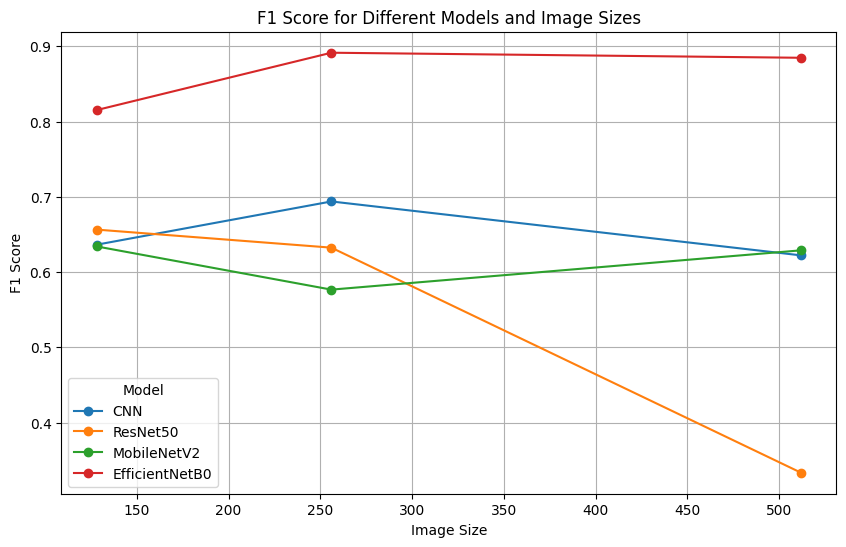

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Define models and image sizes
models = ["CNN", "ResNet50", "MobileNetV2", "EfficientNetB0"]
image_sizes = [128, 256, 512]
base_path = "/kaggle/input/traffic-prediction-models-plotting-value/traffic_prediction_models_Plotting_Value"

# Initialize data structure for F1 scores
f1_scores = {model: {} for model in models}

# Function to calculate F1 score from confusion matrix
def calculate_f1_from_confusion_matrix(conf_matrix):
    TP = conf_matrix[1, 1]  # True Positives
    FP = conf_matrix[0, 1]  # False Positives
    FN = conf_matrix[1, 0]  # False Negatives
    TN = conf_matrix[0, 0]  # True Negatives

    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0

    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Load JSON files and collect F1 scores
for model in models:
    for size in image_sizes:
        file_path = f"{base_path}/{model}_Results_{size}.json"
        with open(file_path, 'r') as f:
            data = json.load(f)
            # Extract the confusion matrix
            confusion_matrix = np.array(data['confusion_matrix'])

            # Calculate F1 score from the confusion matrix
            f1 = calculate_f1_from_confusion_matrix(confusion_matrix)
            f1_scores[model][size] = f1

# Plot F1 score for each model and image size
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting F1 scores for each model
for model in models:
    ax.plot(image_sizes, [f1_scores[model][size] for size in image_sizes], marker='o', label=model)

ax.set_xlabel('Image Size')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score for Different Models and Image Sizes')
ax.legend(title='Model')
plt.grid(True)
plt.savefig('/kaggle/working/f1_score_plot.png')


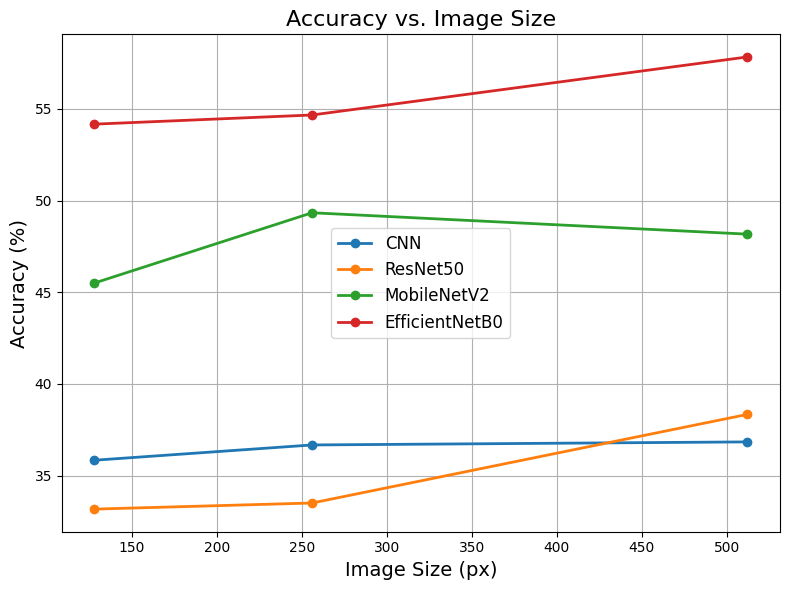

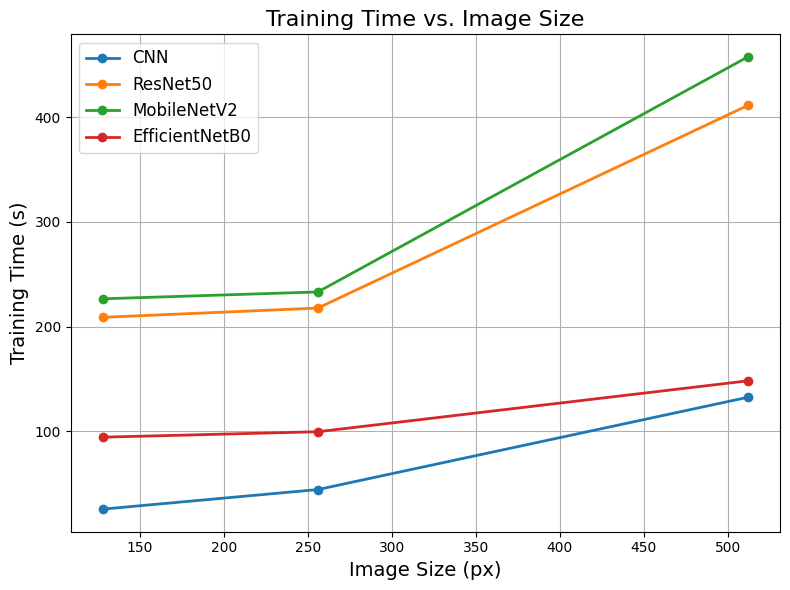

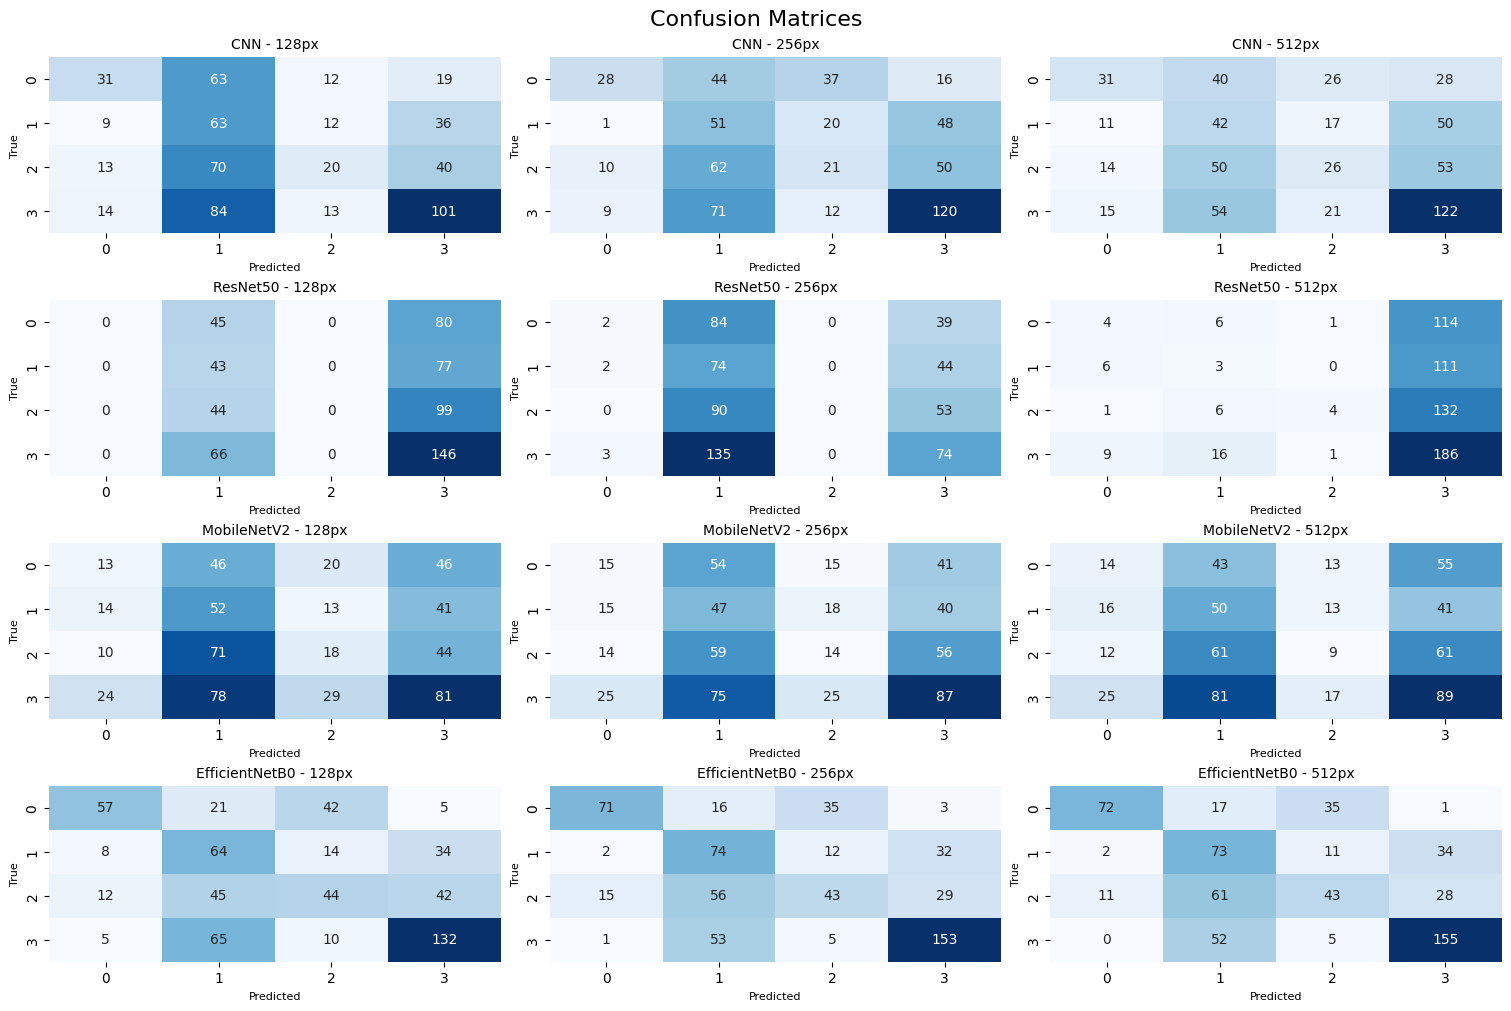

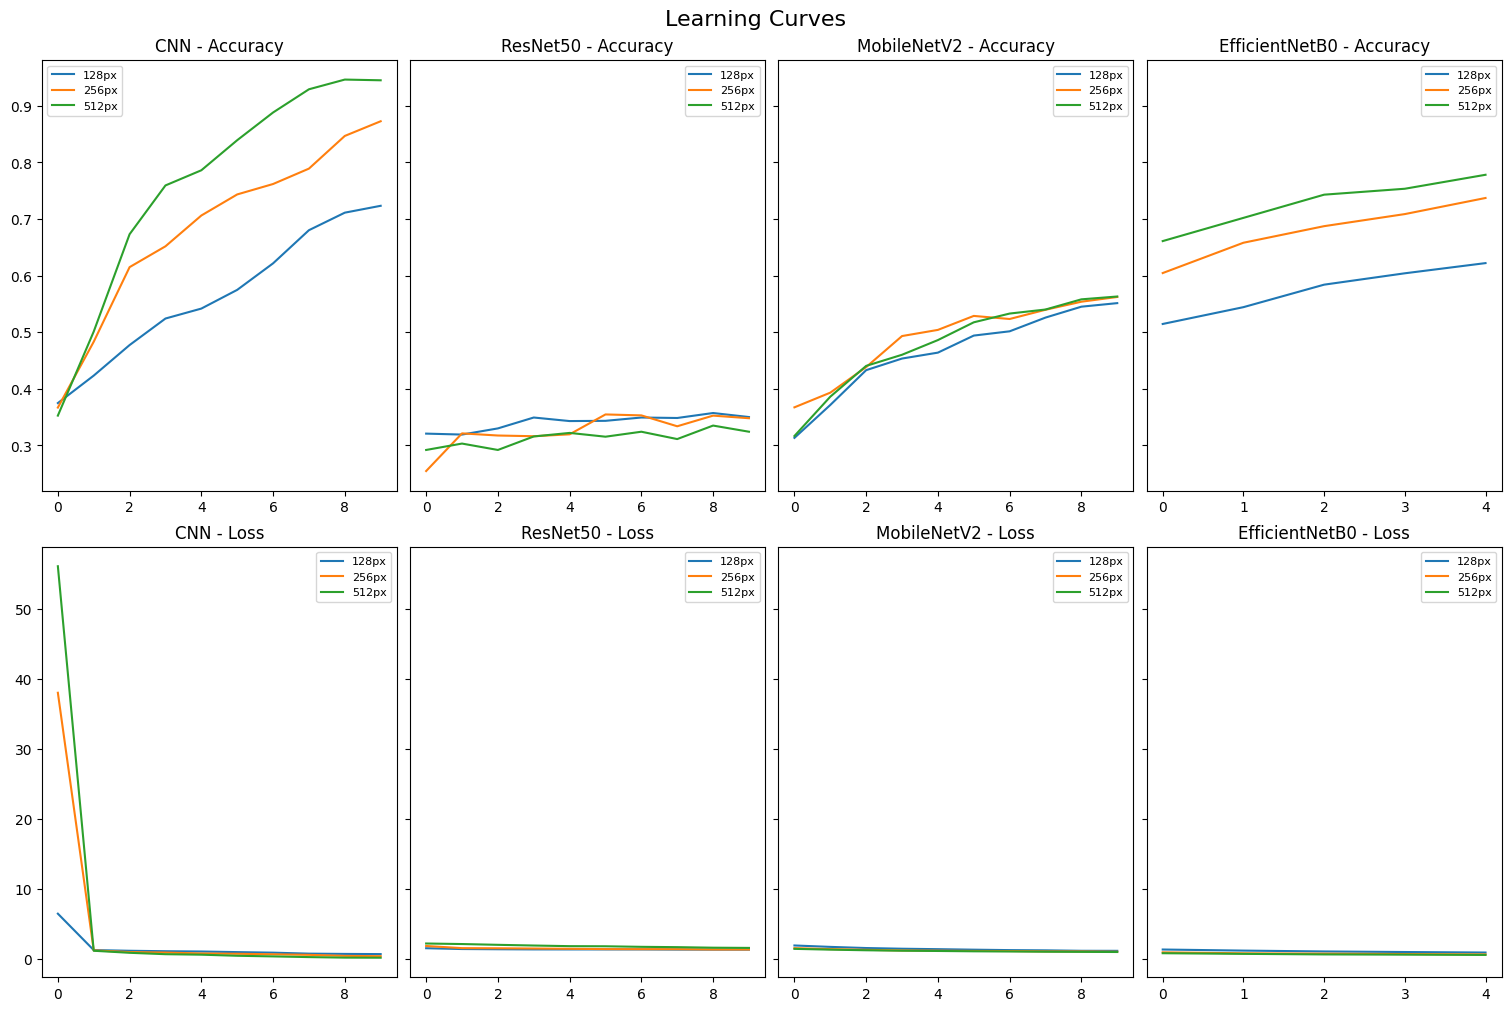

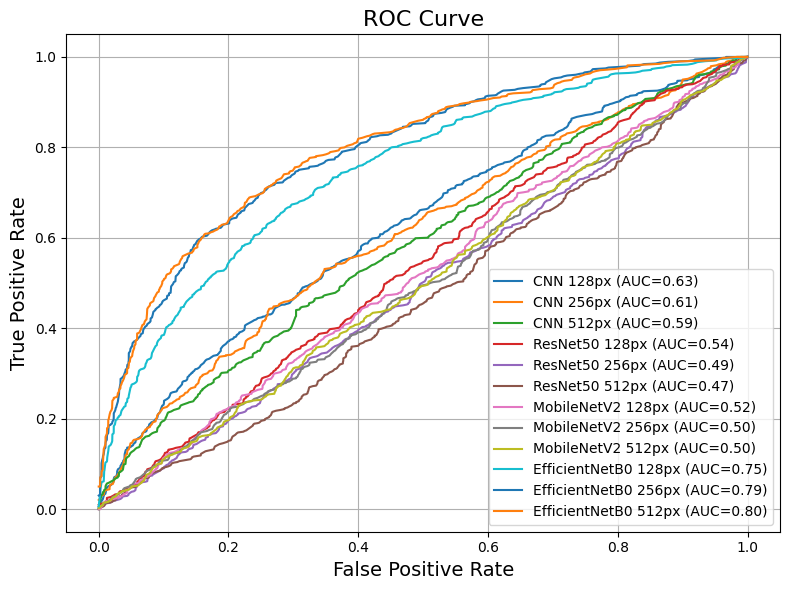

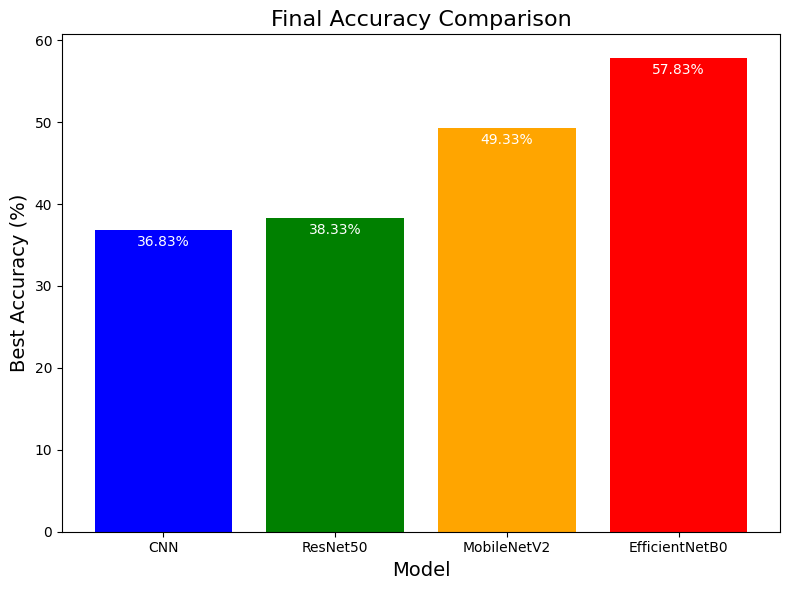

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Define models and image sizes
models = ["CNN", "ResNet50", "MobileNetV2", "EfficientNetB0"]
image_sizes = [128, 256, 512]
base_path = "/kaggle/input/traffic-prediction-models-plotting-value/traffic_prediction_models_Plotting_Value"

# Initialize data structures for plotting
accuracy_data = {model: [] for model in models}
training_time_data = {model: [] for model in models}
roc_data = {model: [] for model in models}
confusion_matrices = {model: {} for model in models}
learning_curves = {model: {} for model in models}

# Load JSON files
for model in models:
    for size in image_sizes:
        file_path = f"{base_path}/{model}_Results_{size}.json"
        with open(file_path, 'r') as f:
            data = json.load(f)
            # Collect data
            accuracy_data[model].append(data['accuracy'])
            training_time_data[model].append(data['training_time'])
            roc_data[model].append((data['roc_curve']['fpr'], data['roc_curve']['tpr'], data['roc_curve']['auc']))
            confusion_matrices[model][size] = data['confusion_matrix']
            learning_curves[model][size] = data['final_model_history']

# Plot 1: Accuracy vs. Image Size
plt.figure(figsize=(8, 6))
for model in models:
    plt.plot(image_sizes, accuracy_data[model], label=model, marker='o', linewidth=2)
plt.title("Accuracy vs. Image Size", fontsize=16)
plt.xlabel("Image Size (px)", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("Accuracy_vs_Image_Size.png", dpi=300)

# Plot 2: Training Time vs. Image Size
plt.figure(figsize=(8, 6))
for model in models:
    plt.plot(image_sizes, training_time_data[model], label=model, marker='o', linewidth=2)
plt.title("Training Time vs. Image Size", fontsize=16)
plt.xlabel("Image Size (px)", fontsize=14)
plt.ylabel("Training Time (s)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("Training_Time_vs_Image_Size.png", dpi=300)

# Plot 3: Confusion Matrices (Heatmaps)
fig, axes = plt.subplots(len(models), len(image_sizes), figsize=(15, 10), constrained_layout=True)
for i, model in enumerate(models):
    for j, size in enumerate(image_sizes):
        sns.heatmap(
            confusion_matrices[model][size],
            annot=True,
            fmt="d",
            cmap="Blues",
            ax=axes[i, j],
            cbar=False
        )
        axes[i, j].set_title(f"{model} - {size}px", fontsize=10)
        axes[i, j].set_xlabel("Predicted", fontsize=8)
        axes[i, j].set_ylabel("True", fontsize=8)
fig.suptitle("Confusion Matrices", fontsize=16)
plt.savefig("Confusion_Matrices.png", dpi=300)

# Plot 4: Learning Curves (Accuracy and Loss vs. Epoch)
fig, axes = plt.subplots(2, len(models), figsize=(15, 10), sharey='row', constrained_layout=True)
for i, model in enumerate(models):
    for size in image_sizes:
        axes[0, i].plot(learning_curves[model][size]['accuracy'], label=f"{size}px")
        axes[1, i].plot(learning_curves[model][size]['loss'], label=f"{size}px")
    axes[0, i].set_title(f"{model} - Accuracy", fontsize=12)
    axes[1, i].set_title(f"{model} - Loss", fontsize=12)
    axes[0, i].legend(fontsize=8)
    axes[1, i].legend(fontsize=8)
fig.suptitle("Learning Curves", fontsize=16)
plt.savefig("Learning_Curves.png", dpi=300)

# Plot 5: ROC Curve
plt.figure(figsize=(8, 6))
for model in models:
    for size, (fpr, tpr, roc_auc) in zip(image_sizes, roc_data[model]):
        plt.plot(fpr, tpr, label=f"{model} {size}px (AUC={roc_auc:.2f})")
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig("ROC_Curve.png", dpi=300)

# Plot 6: Final Accuracy Comparison
best_accuracy = [max(accuracy_data[model]) for model in models]
plt.figure(figsize=(8, 6))
bars = plt.bar(models, best_accuracy, color=["blue", "green", "orange", "red"])
plt.title("Final Accuracy Comparison", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Best Accuracy (%)", fontsize=14)
for bar, acc in zip(bars, best_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, f"{acc:.2f}%", ha="center", fontsize=10, color="white")
plt.tight_layout()
plt.savefig("Final_Accuracy_Comparison.png", dpi=300)


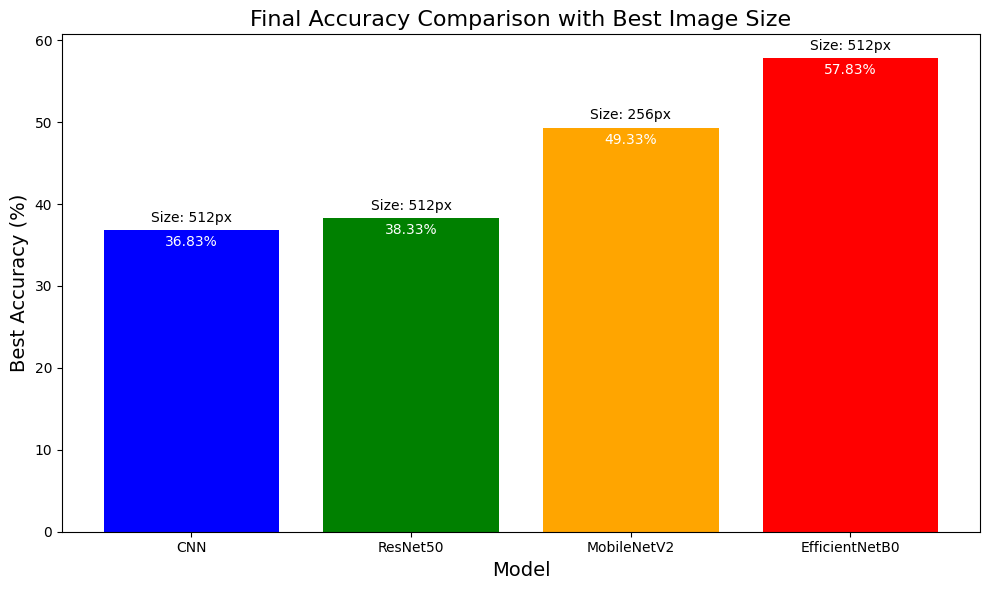

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Define models and image sizes
models = ["CNN", "ResNet50", "MobileNetV2", "EfficientNetB0"]
image_sizes = [128, 256, 512]
base_path = "/kaggle/input/traffic-prediction-models-plotting-value/traffic_prediction_models_Plotting_Value"

# Initialize data structures for accuracy data
accuracy_data = {model: [] for model in models}

# Load JSON files and extract accuracy data
for model in models:
    for size in image_sizes:
        file_path = f"{base_path}/{model}_Results_{size}.json"
        with open(file_path, 'r') as f:
            data = json.load(f)
            accuracy_data[model].append(data['accuracy'])

# Plot 6: Final Accuracy Comparison with Best Image Size
best_accuracy = [max(accuracy_data[model]) for model in models]
best_image_size = [
    image_sizes[np.argmax(accuracy_data[model])] for model in models
]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, best_accuracy, color=["blue", "green", "orange", "red"])

# Add annotations for accuracy and image size on top of the bars
for bar, acc, size in zip(bars, best_accuracy, best_image_size):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2,
             f"{acc:.2f}%", ha="center", fontsize=10, color="white")
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f"Size: {size}px", ha="center", fontsize=10, color="black")

# Add title and labels
plt.title("Final Accuracy Comparison with Best Image Size", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Best Accuracy (%)", fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig("Final_Accuracy_Comparison_with_Image_Size.png", dpi=300)
plt.show()


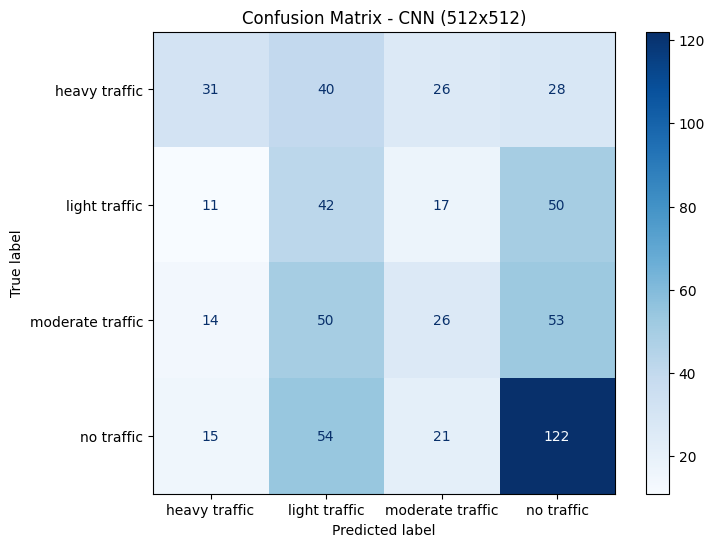

Confusion matrix plot saved for CNN with image size 512: /kaggle/working/confusion_matrices/CNN_confusion_matrix_512.png


<Figure size 640x480 with 0 Axes>

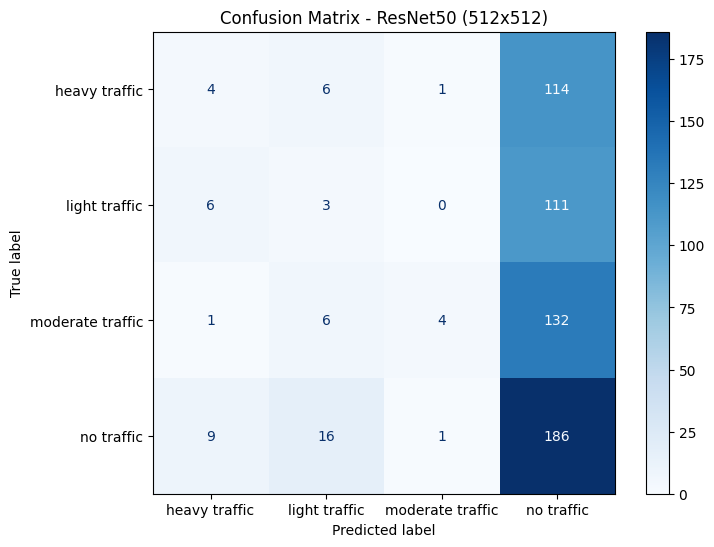

Confusion matrix plot saved for ResNet50 with image size 512: /kaggle/working/confusion_matrices/ResNet50_confusion_matrix_512.png


<Figure size 640x480 with 0 Axes>

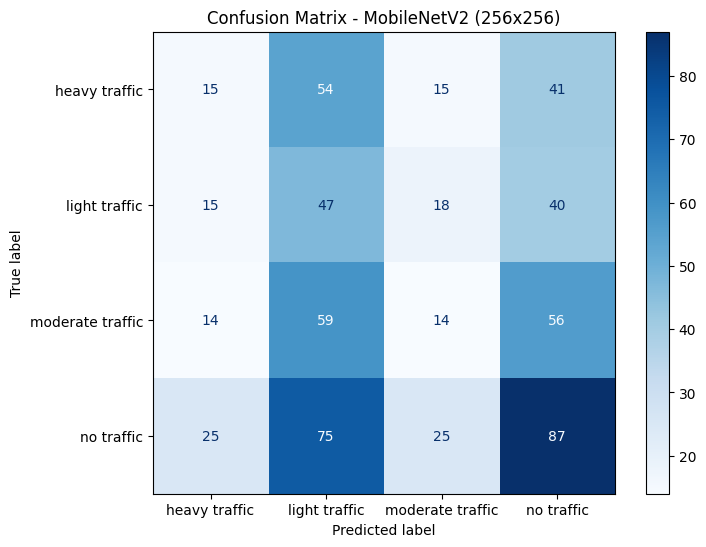

Confusion matrix plot saved for MobileNetV2 with image size 256: /kaggle/working/confusion_matrices/MobileNetV2_confusion_matrix_256.png


<Figure size 640x480 with 0 Axes>

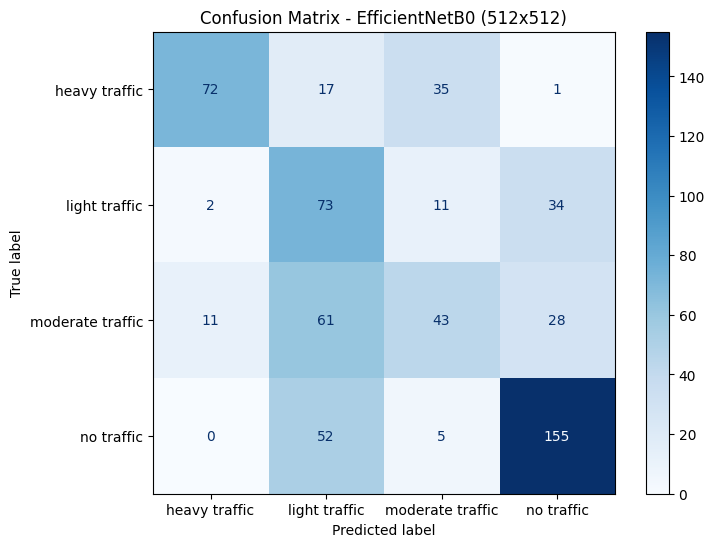

Confusion matrix plot saved for EfficientNetB0 with image size 512: /kaggle/working/confusion_matrices/EfficientNetB0_confusion_matrix_512.png


<Figure size 640x480 with 0 Axes>

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import os

# Define models
models = ["CNN", "ResNet50", "MobileNetV2", "EfficientNetB0"]
image_sizes = [512]  # Default size for all models except MobileNetV2
mobilenet_size = 256  # MobileNetV2 will use 256x256
base_path = "/kaggle/input/traffic-prediction-models-plotting-value/traffic_prediction_models_Plotting_Value"

# Directory to save confusion matrix plots
save_dir = '/kaggle/working/confusion_matrices'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Load JSON files and generate confusion matrix plots
for model in models:
    # Determine the image size based on the model
    for size in [mobilenet_size] if model == "MobileNetV2" else image_sizes:
        file_path = f"{base_path}/{model}_Results_{size}.json"

        # Check if the file exists
        if os.path.exists(file_path):
            # Load the saved JSON data
            with open(file_path, 'r') as f:
                data = json.load(f)

            # Extract the confusion matrix and class names
            confusion_matrix = np.array(data.get('confusion_matrix', []))
            class_names = data.get('class_names', [])

            if confusion_matrix.size > 0:
                # Create a ConfusionMatrixDisplay object
                disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_names)

                # Plot the confusion matrix
                fig, ax = plt.subplots(figsize=(8, 6))
                disp.plot(cmap="Blues", ax=ax, values_format='d')  # You can change cmap if needed

                # Set plot title
                ax.set_title(f"Confusion Matrix - {model} ({size}x{size})")

                # Show the plot
                plt.show()

                # Save the plot as an image
                plot_filename = f"{model}_confusion_matrix_{size}.png"
                plot_filepath = os.path.join(save_dir, plot_filename)
                plt.tight_layout()  # Adjust layout
                plt.savefig(plot_filepath)
                plt.close(fig)  # Close the figure to avoid overlap

                print(f"Confusion matrix plot saved for {model} with image size {size}: {plot_filepath}")

        else:
            print(f"File {file_path} does not exist.")


Confusion matrix plot generated for CNN with image size 512
Confusion matrix plot generated for ResNet50 with image size 512
Confusion matrix plot generated for MobileNetV2 with image size 256
Confusion matrix plot generated for EfficientNetB0 with image size 512


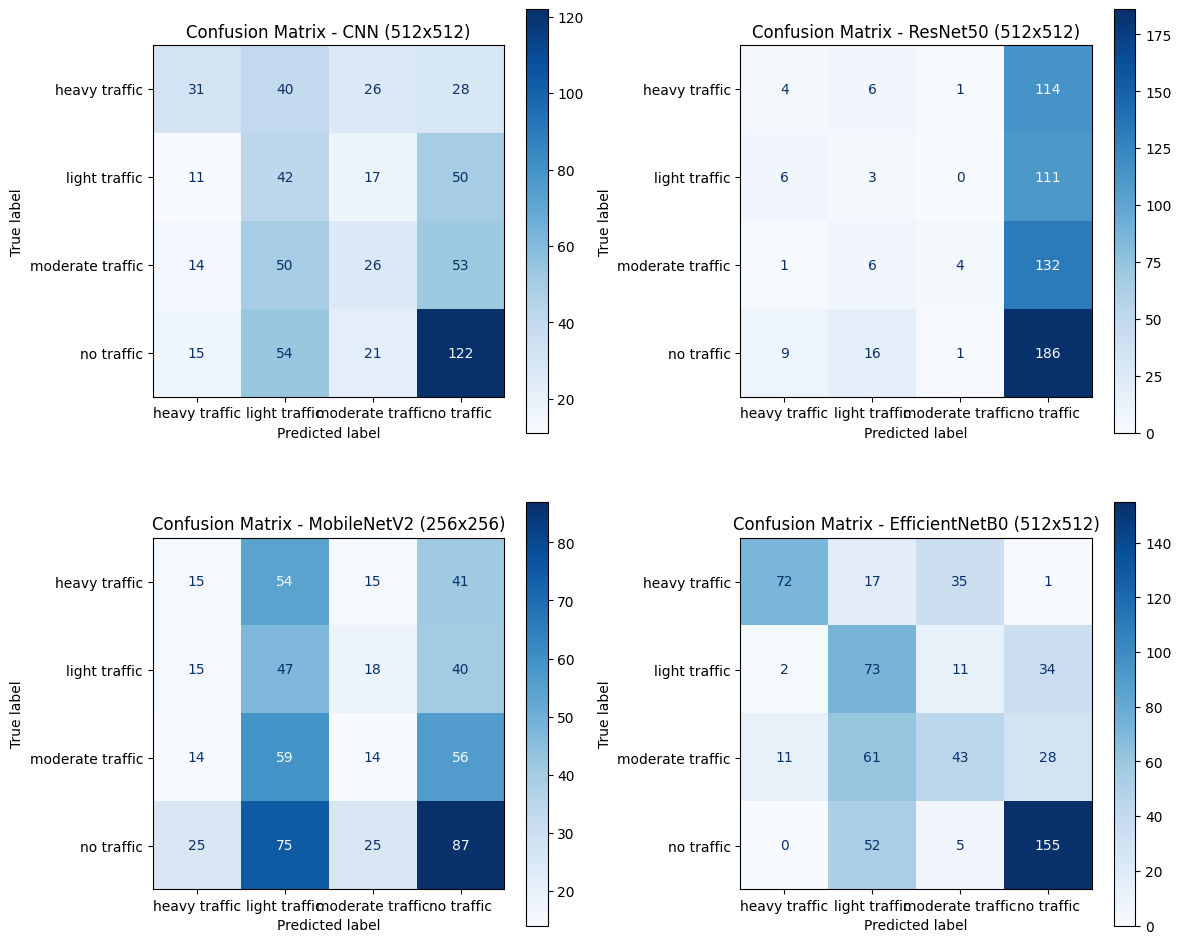

Combined confusion matrix plot saved: /kaggle/working/confusion_matrices/combined_confusion_matrices.png


In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import os

# Define models
models = ["CNN", "ResNet50", "MobileNetV2", "EfficientNetB0"]
image_sizes = [512]  # Default size for all models except MobileNetV2
mobilenet_size = 256  # MobileNetV2 will use 256x256
base_path = "/kaggle/input/traffic-prediction-models-plotting-value/traffic_prediction_models_Plotting_Value"

# Directory to save confusion matrix plots
save_dir = '/kaggle/working/confusion_matrices'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array to make it easier to iterate over

# Loop through models and plot confusion matrices in the subplots
for idx, model in enumerate(models):
    # Determine the image size based on the model
    for size in [mobilenet_size] if model == "MobileNetV2" else image_sizes:
        file_path = f"{base_path}/{model}_Results_{size}.json"

        # Check if the file exists
        if os.path.exists(file_path):
            # Load the saved JSON data
            with open(file_path, 'r') as f:
                data = json.load(f)

            # Extract the confusion matrix and class names
            confusion_matrix = np.array(data.get('confusion_matrix', []))
            class_names = data.get('class_names', [])

            if confusion_matrix.size > 0:
                # Create a ConfusionMatrixDisplay object
                disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_names)

                # Plot the confusion matrix in the corresponding subplot
                ax = axes[idx]
                disp.plot(cmap="Blues", ax=ax, values_format='d')  # You can change cmap if needed

                # Set plot title
                ax.set_title(f"Confusion Matrix - {model} ({size}x{size})")

                # Print success message
                print(f"Confusion matrix plot generated for {model} with image size {size}")

        else:
            print(f"File {file_path} does not exist.")

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the entire 2x2 subplot figure
plot_filename = "combined_confusion_matrices.png"
plot_filepath = os.path.join(save_dir, plot_filename)
plt.savefig(plot_filepath)

# Show the figure with all the subplots
plt.show()

print(f"Combined confusion matrix plot saved: {plot_filepath}")


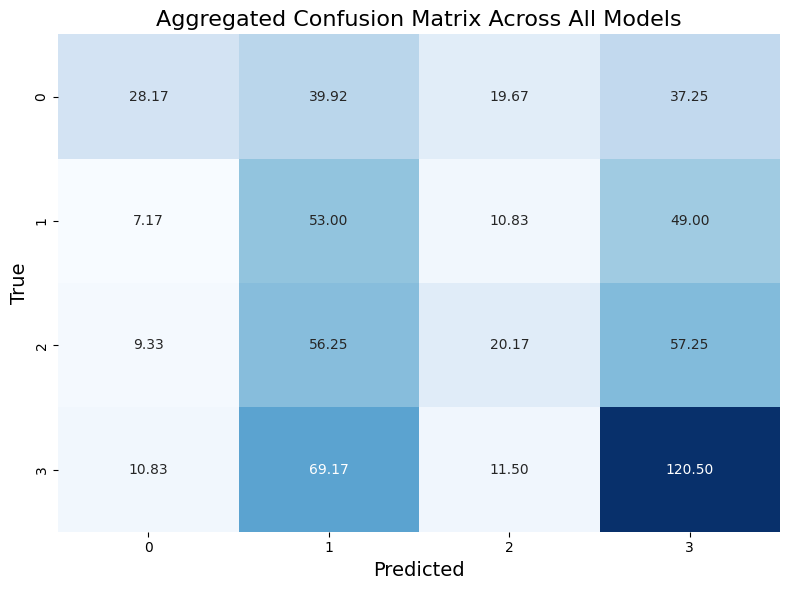

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define models and image sizes
models = ["CNN", "ResNet50", "MobileNetV2", "EfficientNetB0"]
image_sizes = [128, 256, 512]
base_path = "/kaggle/input/traffic-prediction-models-plotting-value/traffic_prediction_models_Plotting_Value"

# Initialize data structure for confusion matrices
confusion_matrices = {model: {} for model in models}

# Load JSON files and confusion matrices
for model in models:
    for size in image_sizes:
        file_path = f"{base_path}/{model}_Results_{size}.json"
        with open(file_path, 'r') as f:
            data = json.load(f)
            confusion_matrices[model][size] = data['confusion_matrix']

aggregated_cm = np.zeros_like(list(confusion_matrices[models[0]][image_sizes[0]]), dtype=float)

for model in models:
    for size in image_sizes:
        cm = np.array(confusion_matrices[model][size])
        aggregated_cm += cm

# Normalize the aggregated confusion matrix
aggregated_cm /= len(models) * len(image_sizes)

# Plot the aggregated confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(aggregated_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Aggregated Confusion Matrix Across All Models", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
plt.tight_layout()
plt.savefig("Aggregated_Confusion_Matrix.png", dpi=300)


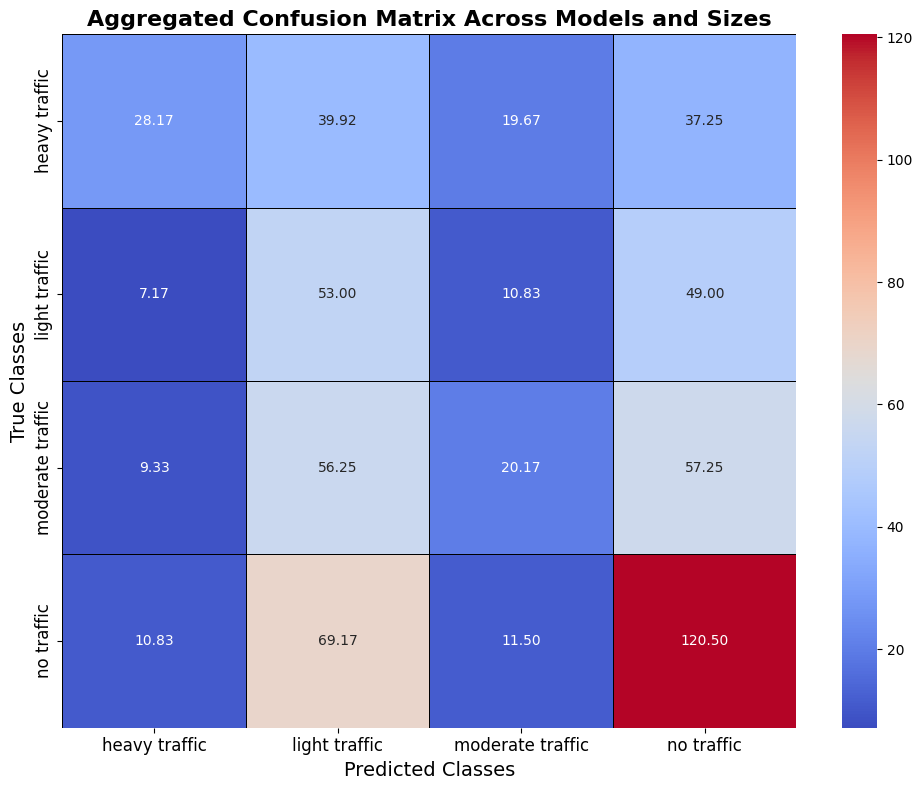

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define models and image sizes
models = ["CNN", "ResNet50", "MobileNetV2", "EfficientNetB0"]
image_sizes = [128, 256, 512]
base_path = "/kaggle/input/traffic-prediction-models-plotting-value/traffic_prediction_models_Plotting_Value"

# Initialize data structure for confusion matrices
confusion_matrices = {model: {} for model in models}

# Load JSON files and confusion matrices
for model in models:
    for size in image_sizes:
        file_path = f"{base_path}/{model}_Results_{size}.json"
        with open(file_path, 'r') as f:
            data = json.load(f)
            confusion_matrices[model][size] = data['confusion_matrix']

# ---- Option 3: Aggregated Confusion Matrix (Enhanced for Publication) ----
# Initialize a larger figure for better visibility
fig, ax = plt.subplots(figsize=(10, 8))  # Increased figure size for publication

# Aggregate confusion matrices across models and sizes
aggregated_cm = np.zeros_like(list(confusion_matrices[models[0]][image_sizes[0]]), dtype=float)

for model in models:
    for size in image_sizes:
        cm = np.array(confusion_matrices[model][size])
        aggregated_cm += cm

# Normalize the aggregated confusion matrix
aggregated_cm /= (len(models) * len(image_sizes))

# Plot the aggregated confusion matrix with a clear color map and proper labels
sns.heatmap(aggregated_cm, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5, linecolor='black')

# Add titles and labels for clarity
plt.title("Aggregated Confusion Matrix Across Models and Sizes", fontsize=16, fontweight="bold")
plt.xlabel("Predicted Classes", fontsize=14)
plt.ylabel("True Classes", fontsize=14)

# Customize the appearance further (font sizes, ticks, etc.)
class_labels = ['heavy traffic', 'light traffic', 'moderate traffic', 'no traffic']
plt.xticks(ticks=np.arange(0.5, len(class_labels)), labels=class_labels, fontsize=12)
plt.yticks(ticks=np.arange(0.5, len(class_labels)), labels=class_labels, fontsize=12)

# Save the final version of the plot for your paper
plt.tight_layout()
plt.savefig("Aggregated_Confusion_Matrix_Labeled.png", dpi=300)

# Show the plot for verification
plt.show()


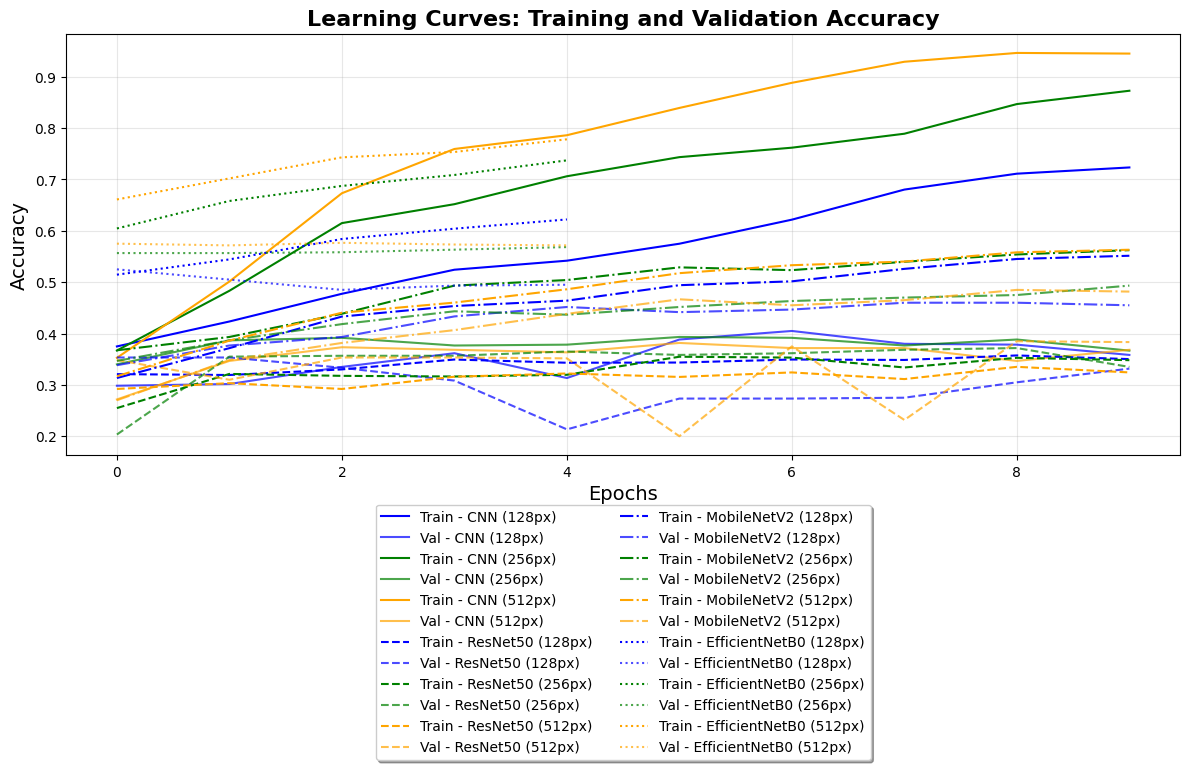

In [ ]:
import json
import matplotlib.pyplot as plt

# Define models and image sizes
models = ["CNN", "ResNet50", "MobileNetV2", "EfficientNetB0"]
image_sizes = [128, 256, 512]
base_path = "/kaggle/input/traffic-prediction-models-plotting-value/traffic_prediction_models_Plotting_Value"

# Initialize storage for learning curves
learning_curves = {model: {} for model in models}

# Load JSON files and extract learning curves
for model in models:
    for size in image_sizes:
        file_path = f"{base_path}/{model}_Results_{size}.json"
        with open(file_path, 'r') as f:
            data = json.load(f)
            learning_curves[model][size] = {
                "accuracy": data["final_model_history"]["accuracy"],
                "val_accuracy": data["final_model_history"]["val_accuracy"],
                "loss": data["final_model_history"]["loss"],
                "val_loss": data["final_model_history"]["val_loss"]
            }

# ---- Single Plot for Comparison ----
fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size for clarity

# Define line styles and colors for better differentiation
line_styles = ["-", "--", "-.", ":"]
colors = ["blue", "green", "orange", "red"]

# Plot accuracy curves for each model and image size
for i, model in enumerate(models):
    for j, size in enumerate(image_sizes):
        history = learning_curves[model][size]
        label = f"{model} ({size}px)"  # Label includes model and image size

        # Training accuracy
        ax.plot(
            history["accuracy"],
            label=f"Train - {label}",
            linestyle=line_styles[i % len(line_styles)],
            color=colors[j % len(colors)]
        )

        # Validation accuracy
        ax.plot(
            history["val_accuracy"],
            label=f"Val - {label}",
            linestyle=line_styles[i % len(line_styles)],
            color=colors[j % len(colors)],
            alpha=0.7  # Slightly transparent for validation curves
        )

# Add labels, title, legend, and grid
ax.set_title("Learning Curves: Training and Validation Accuracy", fontsize=16, fontweight="bold")
ax.set_xlabel("Epochs", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)

# Adjust the legend
ax.legend(
    fontsize=10,
    loc="upper center",  # Move the legend above the plot
    bbox_to_anchor=(0.5, -0.1),  # Position it below the plot
    ncol=2,  # Split into two columns for compactness
    frameon=True,  # Add a box around the legend
    fancybox=True,  # Rounded edges for the box
    shadow=True     # Add a shadow for better visibility
)

# Add grid for better readability
ax.grid(alpha=0.3)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("Learning_Curves_Comparison_Adjusted.png", dpi=300)

# Show the plot
plt.show()


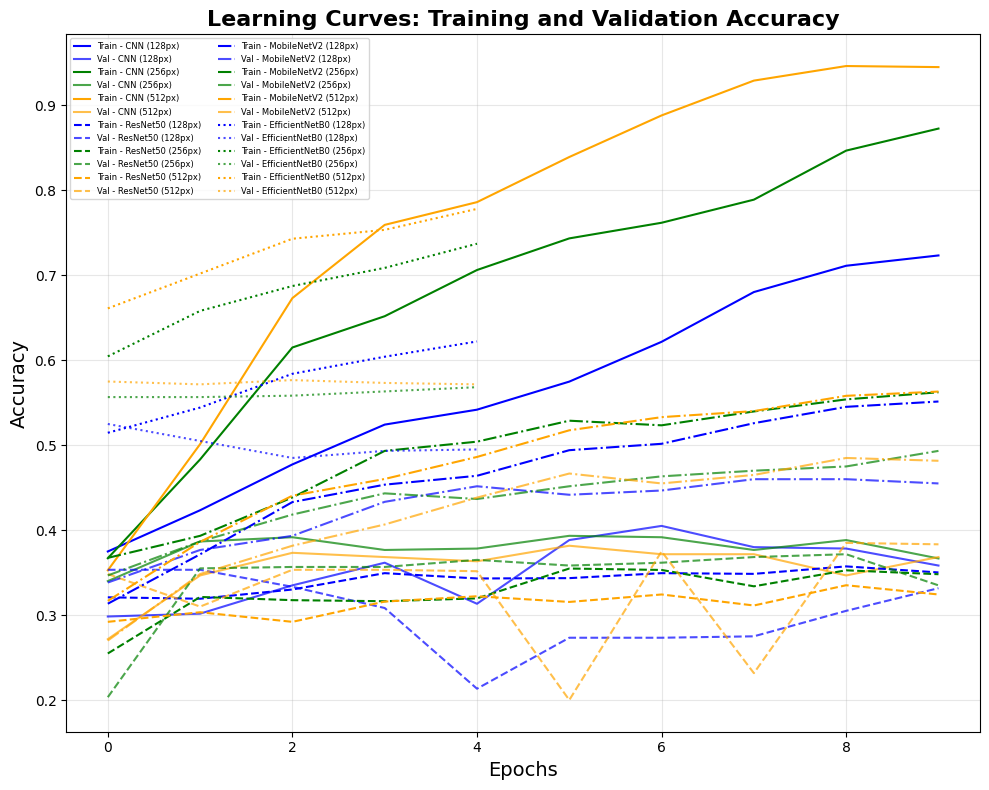

In [ ]:
import json
import matplotlib.pyplot as plt

# Define models and image sizes
models = ["CNN", "ResNet50", "MobileNetV2", "EfficientNetB0"]
image_sizes = [128, 256, 512]
base_path = "/kaggle/input/traffic-prediction-models-plotting-value/traffic_prediction_models_Plotting_Value"

# Initialize storage for learning curves
learning_curves = {model: {} for model in models}

# Load JSON files and extract learning curves
for model in models:
    for size in image_sizes:
        file_path = f"{base_path}/{model}_Results_{size}.json"
        with open(file_path, 'r') as f:
            data = json.load(f)
            learning_curves[model][size] = {
                "accuracy": data["final_model_history"]["accuracy"],
                "val_accuracy": data["final_model_history"]["val_accuracy"],
                "loss": data["final_model_history"]["loss"],
                "val_loss": data["final_model_history"]["val_loss"]
            }

# ---- Single Plot for Comparison ----
fig, ax = plt.subplots(figsize=(10, 8))  # Set figure size

# Define line styles and colors for better differentiation
line_styles = ["-", "--", "-.", ":"]
colors = ["blue", "green", "orange", "red"]

# Plot accuracy curves for each model and image size
for i, model in enumerate(models):
    for j, size in enumerate(image_sizes):
        history = learning_curves[model][size]
        label = f"{model} ({size}px)"  # Label includes model and image size

        # Training accuracy
        ax.plot(
            history["accuracy"],
            label=f"Train - {label}",
            linestyle=line_styles[i % len(line_styles)],
            color=colors[j % len(colors)]
        )

        # Validation accuracy
        ax.plot(
            history["val_accuracy"],
            label=f"Val - {label}",
            linestyle=line_styles[i % len(line_styles)],
            color=colors[j % len(colors)],
            alpha=0.7  # Slightly transparent for validation curves
        )

# Add labels, title, legend, and grid
ax.set_title("Learning Curves: Training and Validation Accuracy", fontsize=16, fontweight="bold")
ax.set_xlabel("Epochs", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)

# Move legend to the top-left with two columns
ax.legend(
    fontsize=6,
    loc="upper left",  # Position in the top-left
    ncol=2,            # Two columns for compactness
    frameon=True,      # Add a box around the legend
    fancybox=True,     # Rounded edges for the box
    # shadow=True,        # Add a shadow for better visibility
    # framealpha=0.7     # Set transparency (0.0 = fully transparent, 1.0 = fully opaque)
)

# Add grid for better readability
ax.grid(alpha=0.3)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("Learning_Curves_Training_and_Validation_Accuracy_with_Legend.png", dpi=300)

# Show the plot
plt.show()


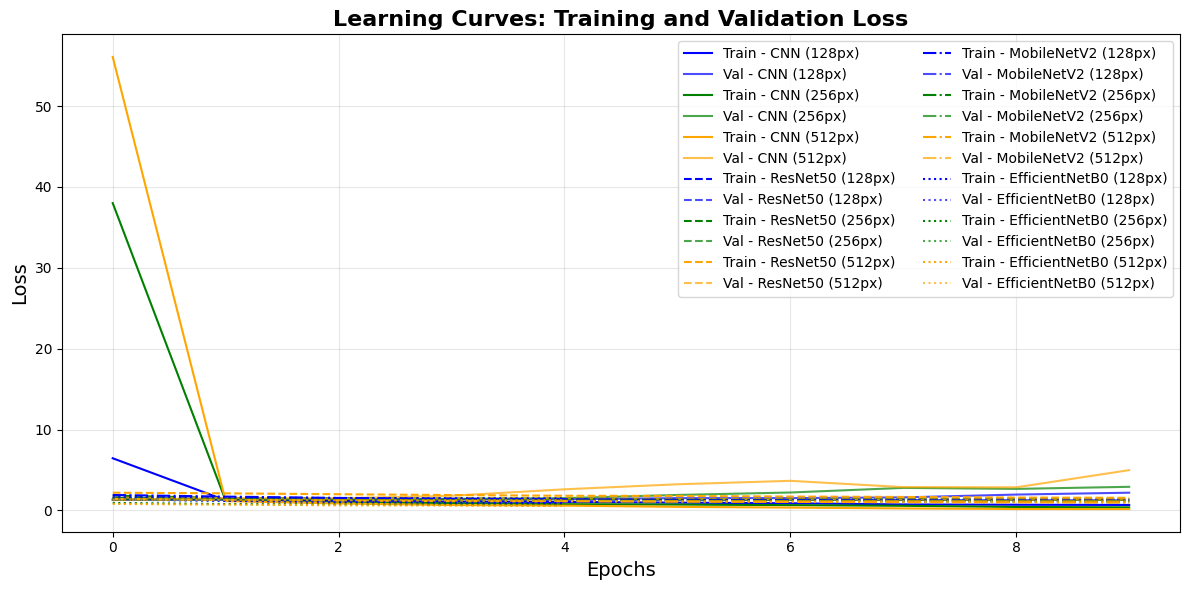

In [ ]:
import json
import matplotlib.pyplot as plt

# Define models and image sizes
models = ["CNN", "ResNet50", "MobileNetV2", "EfficientNetB0"]
image_sizes = [128, 256, 512]
base_path = "/kaggle/input/traffic-prediction-models-plotting-value/traffic_prediction_models_Plotting_Value"

# Initialize storage for learning curves
learning_curves = {model: {} for model in models}

# Load JSON files and extract learning curves
for model in models:
    for size in image_sizes:
        file_path = f"{base_path}/{model}_Results_{size}.json"
        with open(file_path, 'r') as f:
            data = json.load(f)
            learning_curves[model][size] = {
                "accuracy": data["final_model_history"]["accuracy"],
                "val_accuracy": data["final_model_history"]["val_accuracy"],
                "loss": data["final_model_history"]["loss"],
                "val_loss": data["final_model_history"]["val_loss"]
            }

# ---- Single Plot for Loss Comparison ----
plt.figure(figsize=(12, 6))  # Set figure size

# Define line styles and colors for better differentiation
line_styles = ["-", "--", "-.", ":"]
colors = ["blue", "green", "orange", "red"]

# Plot loss curves for each model and image size
for i, model in enumerate(models):
    for j, size in enumerate(image_sizes):
        history = learning_curves[model][size]
        label = f"{model} ({size}px)"  # Label includes model and image size

        # Training loss
        plt.plot(
            history["loss"],
            label=f"Train - {label}",
            linestyle=line_styles[i % len(line_styles)],
            color=colors[j % len(colors)]
        )

        # Validation loss
        plt.plot(
            history["val_loss"],
            label=f"Val - {label}",
            linestyle=line_styles[i % len(line_styles)],
            color=colors[j % len(colors)],
            alpha=0.7  # Slightly transparent for validation curves
        )

# Add labels, title, legend, and grid
plt.title("Learning Curves: Training and Validation Loss", fontsize=16, fontweight="bold")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)

# Move legend to the top-left with two columns
plt.legend(
    fontsize=10,
    loc="upper right",  # Position in the top-left
    ncol=2,            # Two columns for compactness
    frameon=True,      # Add a box around the legend
    fancybox=True      # Rounded edges for the box
)

# Add grid for better readability
plt.grid(alpha=0.3)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("Learning_Curves_Training_and_Validation_Loss.png", dpi=300)

# Show the plot
plt.show()
